In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [62]:
ER = 13
P = 1.0 
T = 1300.0

Name = "0D_LUC"

data_d0 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/Detailed/0Dreactor_ER{ER}_T{T}_P{P}.csv")
data_r0 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/Reduced/0Dreactor_ER{ER}_T{T}_P{P}.csv")
data1 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/140_AED/0Dreactor_ER{ER}_T{T}_P{P}.csv")
data2= pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/140_AEDML/0Dreactor_ER{ER}_T{T}_P{P}.csv") 
data3 = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/140_ORCH/0Dreactor_ER{ER}_T{T}_P{P}.csv")

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/Processing_Reduced.csv")
# data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name}/Processing_OptimB.csv")
loc_data_d = data_d[(data_d["Phi_Init"]==ER) & (data_d["P_Init"]==P*101325.0) & (data_d["T_Init"]==T) ]
loc_data_r = data_r[(data_r["Phi_Init"]==ER) & (data_r["P_Init"]==P*101325.0) & (data_r["T_Init"]==T) ]


species = [col for col in data_r.columns if col.startswith("Y_")]

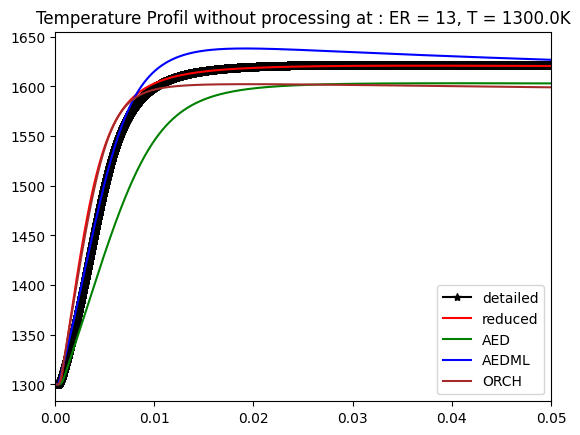

In [63]:
plt.plot(data_d0["t"],data_d0["T"],'k-*', label='detailed')
plt.plot(data_r0["t"],data_r0["T"],'r-', label='reduced')
plt.plot(data1["t"],data1["T"],'g-', label='AED')
plt.plot(data2["t"],data2["T"],'b-', label='AEDML')
plt.plot(data3["t"],data3["T"],'brown', label='ORCH')
# plt.plot(data_otim0["t"],data_otim0["T"],'g-', label='optim A')
plt.legend()
plt.xlim([0,0.05])
plt.title(f"Temperature Profil without processing at : ER = {ER}, T = {T}K")
plt.savefig(f"temperature_ER{ER}_T{T}.png")

/tmp/ipykernel_97645/812198973.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


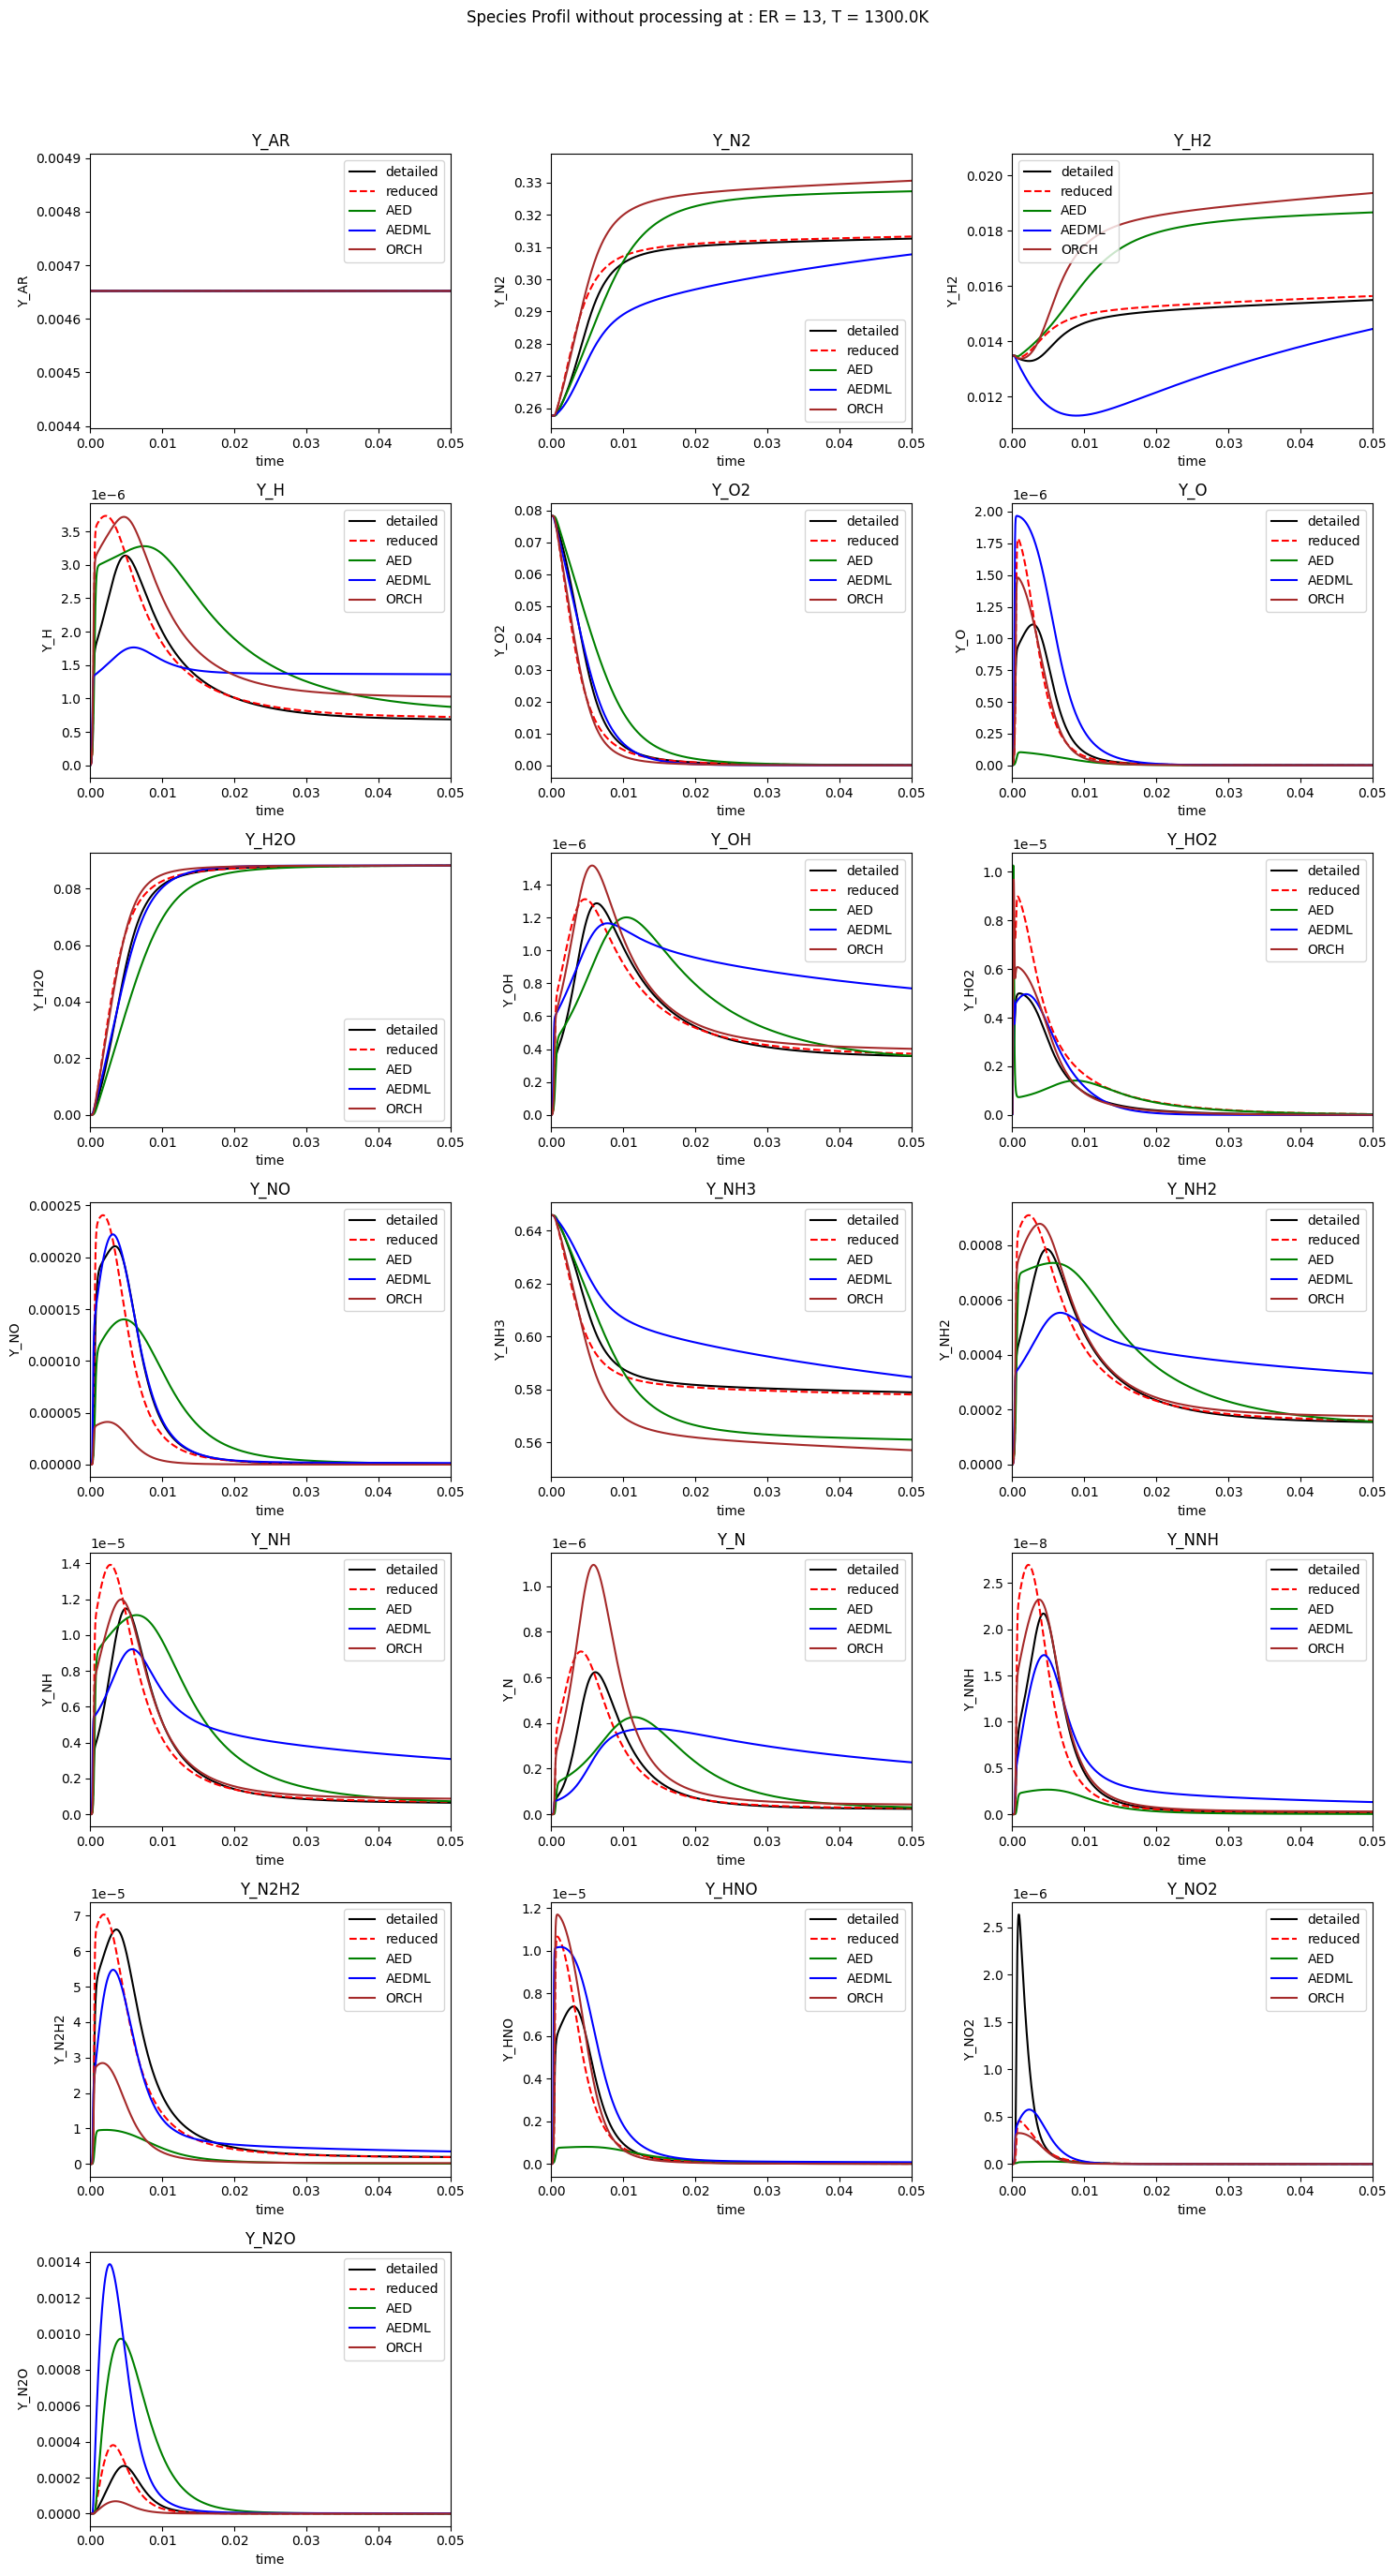

In [64]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False,constrained_layout=True)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(data_d0["t"], data_d0[s], 'k-', label='detailed')
    ax.plot(data_r0["t"], data_r0[s], 'r--', label='reduced')
    ax.plot(data1["t"],data1[s],'g', label='AED')
    ax.plot(data2["t"],data2[s],'b', label='AEDML')
    ax.plot(data3["t"],data3[s],'brown', label='ORCH')
    ax.set_xlim([0,0.05])
    # ax.plot(data_otim0["t"], data_otim0[s], 'g-.', label='optim B')
    ax.set_xlabel("time")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

fig.suptitle(f"Species Profil without processing at : ER = {ER}, T = {T}K")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"Species_ER{ER}_T{T}.png")



/tmp/ipykernel_586494/945547070.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


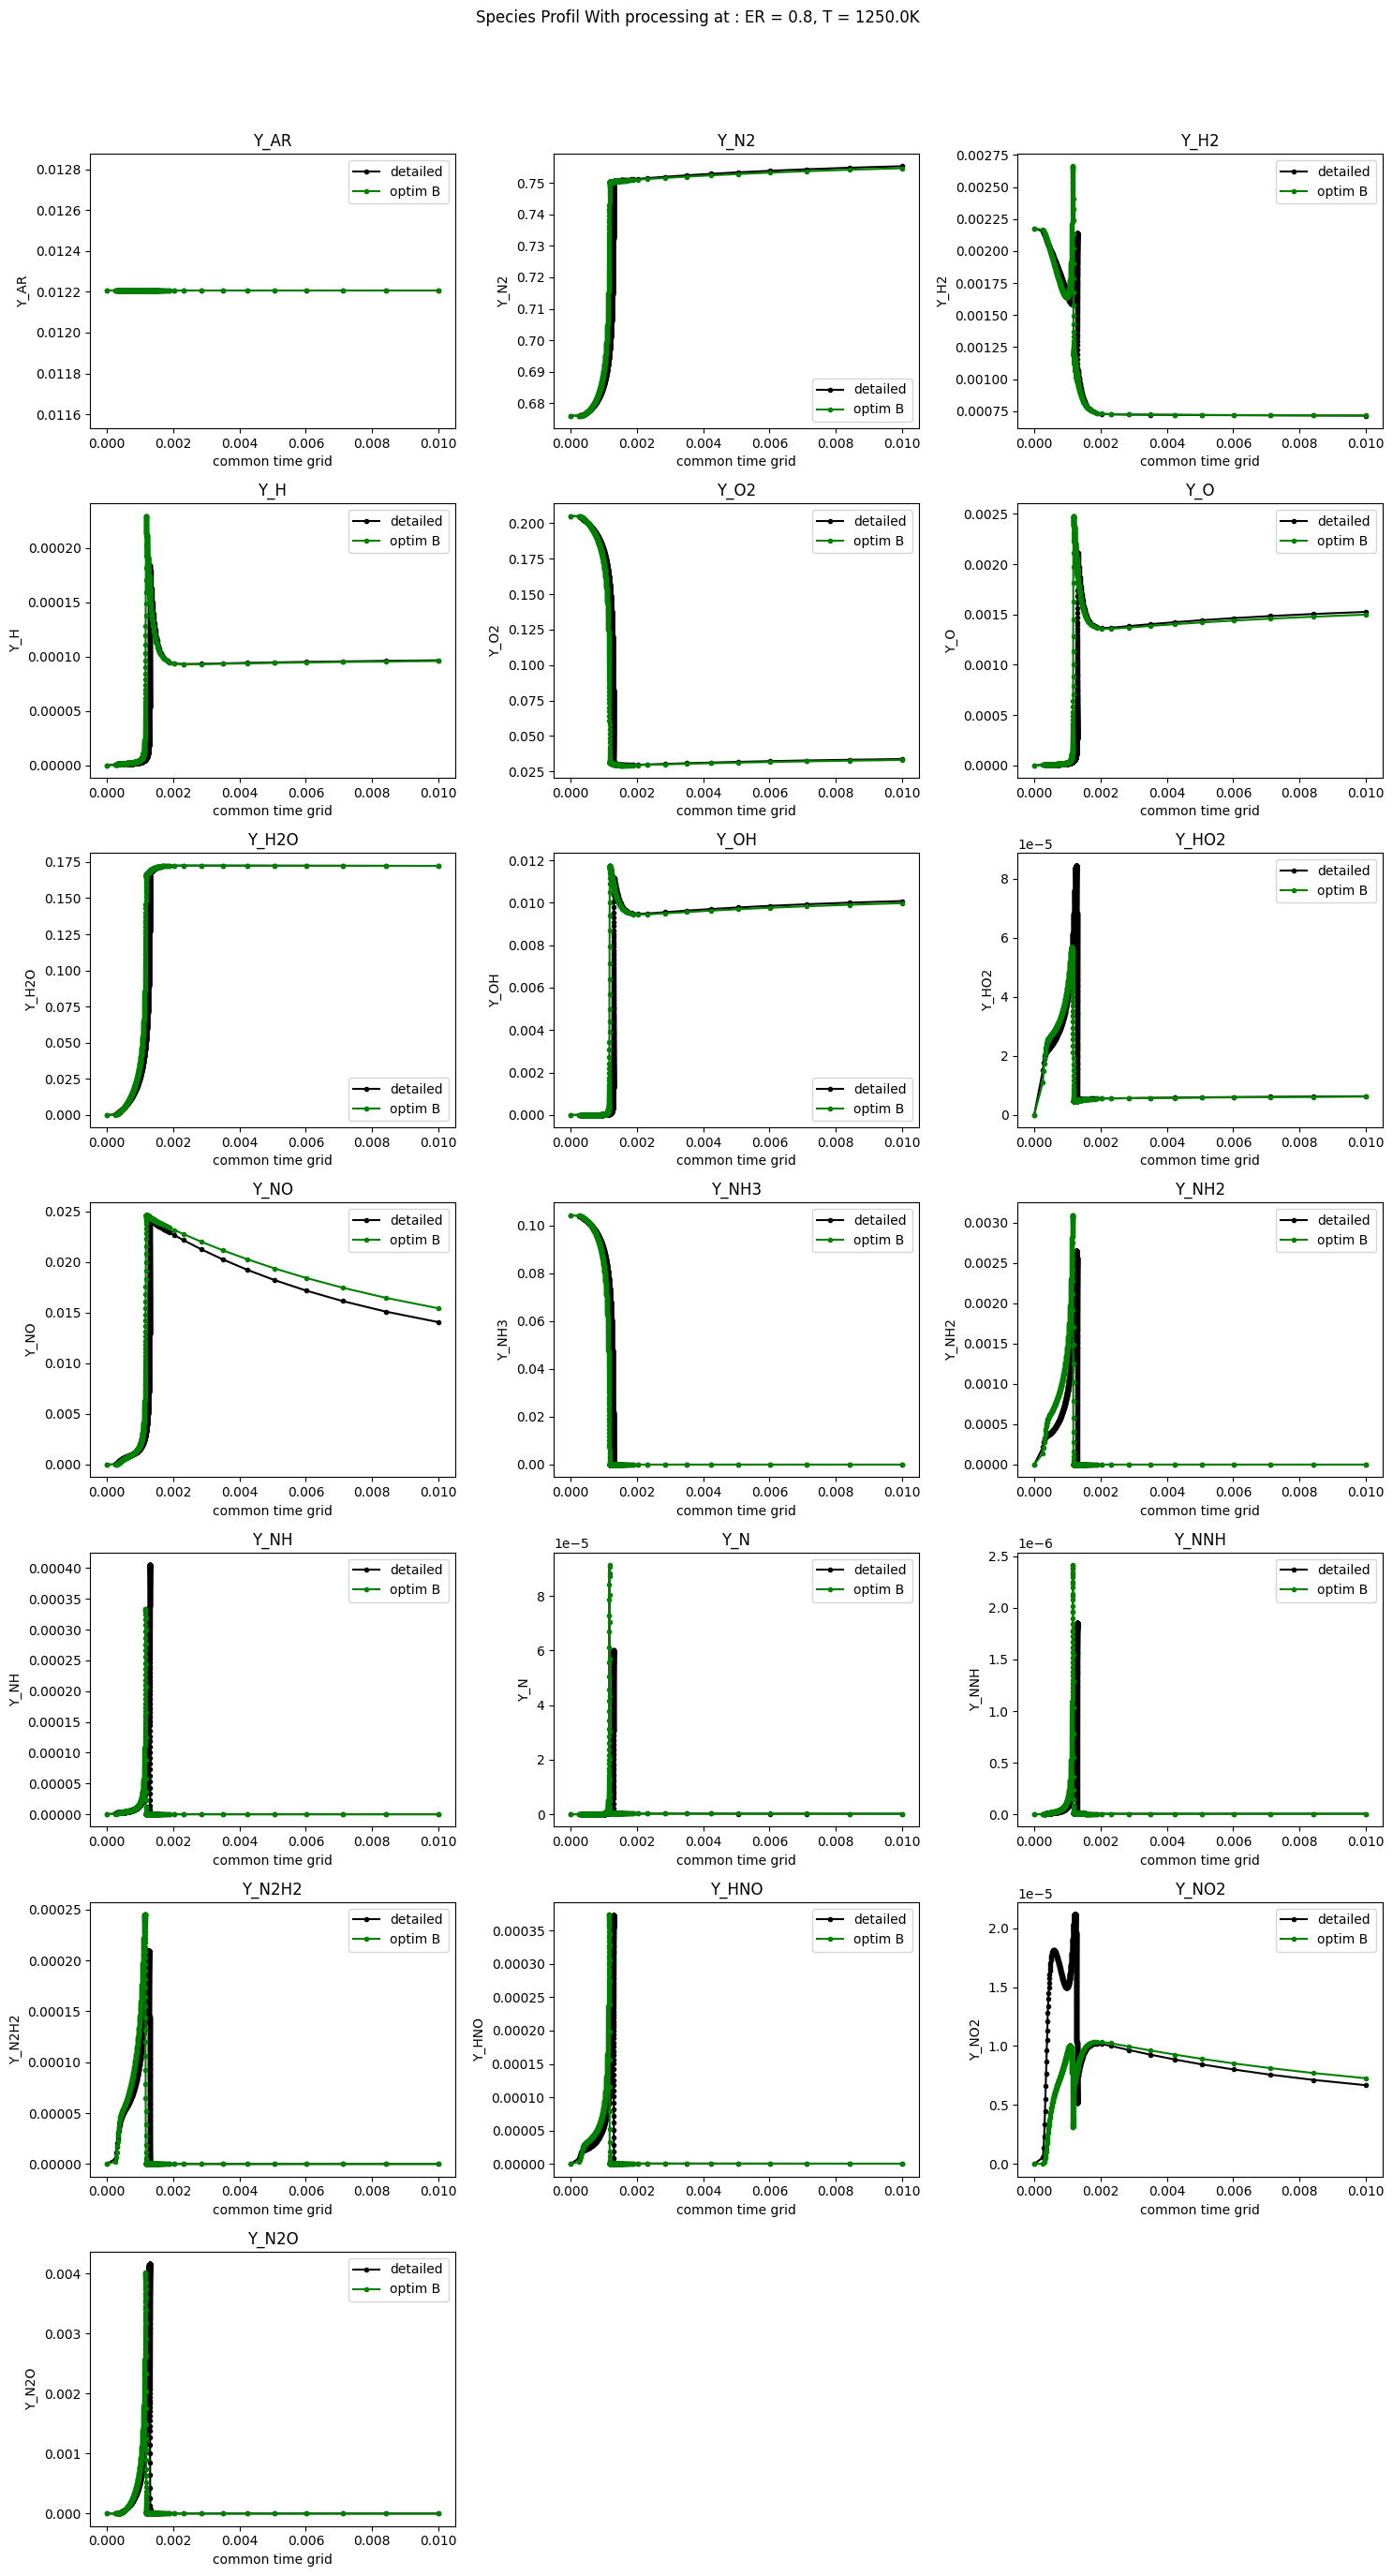

In [8]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False,constrained_layout=True)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(loc_data_d["common_grid"], loc_data_d[s], 'k.-', label='detailed')
    # ax.plot(loc_data_r["common_grid"], loc_data_r[s], 'r.-', label='reduced')
    ax.plot(loc_data_o["common_grid"], loc_data_o[s], 'g.-', label='optim B')
    ax.set_xlabel("common time grid")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])
fig.suptitle(f"Species Profil With processing at : ER = {ER}, T = {T}K")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Species_Processing.png")

